# The website link https://pokemondb.net/pokedex/all

In [1]:
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs

In [2]:
poke_data = pd.read_json("Pokemon Data.json")

In [3]:
poke_data

,Pokemon Number,Stat Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Mega,First Type,Second Type,Species,First Ability,Second Ability,Hidden Ability,Generation,Is Sub Legendary,Is Legendary,Is Mythical
Bulbasaur,1,318,45,49,49,65,65,45,False,Grass,Poison,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,False,False,False
Ivysaur,2,405,60,62,63,80,80,60,False,Grass,Poison,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,False,False,False
Venusaur,3,525,80,82,83,100,100,80,False,Grass,Poison,Seed Pokémon,Overgrow,None,Chlorophyll,Generation 1,False,False,False
Venusaur(Mega Venusaur),3,625,80,100,123,122,120,80,True,Grass,Poison,Seed Pokémon,Thick Fat,None,None,Generation 6,False,False,False
Charmander,4,309,39,52,43,60,50,65,False,Fire,None,Lizard Pokémon,Blaze,None,Solar Power,Generation 1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glastrier,896,580,100,145,130,65,110,30,False,Ice,None,Wild Horse Pokémon,Grim Neigh,None,None,Generation 8,True,False,False
Spectrier,897,580,100,65,60,145,80,130,False,Ghost,None,Swift Horse Pokémon,Unnerve,None,None,Generation 8,True,False,False
Calyrex,898,500,100,80,80,80,80,80,False,Psychic,Grass,King Pokémon,As One,None,None,Generation 8,False,True,False
Calyrex(Ice Rider),898,680,100,165,150,85,130,50,False,Psychic,Ice,King Pokémon,As One,None,None,Generation 8,False,True,False


# Which Generation had the highest stat total?

In [4]:
Generation_arrangement = poke_data.pivot_table(values = "Stat Total", index = "Generation",
                                               fill_value = "No Pokemon", aggfunc = [np.mean, np.median])

In [5]:
Generation_arrangement["mean"].sort_values("Stat Total", ascending = False)

,Stat Total
Generation,
Generation 6,504.007576
Generation 4,451.931034
Generation 8,450.243697
Generation 7,449.179487
Generation 5,434.896970
Generation 3,413.307692
Generation 1,407.967320
Generation 2,407.180000


## We can see that Generation 6 has the highest mean stat total

### One possible reason for this is that all the megas are considered as generation 6 pokemon
#### Proof:

In [6]:
poke_data[poke_data["Mega"] == True].groupby("Generation")["Mega"].count()

Generation
Generation 6    48
Name: Mega, dtype: int64

#### Megas have a higher base stat average than regular Pokémon

In [7]:
poke_data.groupby("Mega")["Stat Total"].mean()

Mega
False    430.724173
True     617.750000
Name: Stat Total, dtype: float64

#### And it is quite the difference!

### Now we'll calculate the average without including megas

In [8]:
poke_data[poke_data["Mega"] == False].pivot_table(values = "Stat Total", index = "Generation"
                                                 ).sort_values("Stat Total", ascending = False)

,Stat Total
Generation,
Generation 4,451.931034
Generation 8,450.243697
Generation 7,449.179487
Generation 6,439.011905
Generation 5,434.896970
Generation 3,413.307692
Generation 1,407.967320
Generation 2,407.180000


### Now Generation 6 has been bumped down dramatically in the rating, generation 4 is now first

In [9]:
special = poke_data[poke_data["Is Legendary"] == True]

In [10]:
special.pivot_table(values = "Stat Total", index = "Generation")

,Stat Total
Generation,
Generation 1,680.000000
Generation 2,680.000000
Generation 3,712.000000
Generation 4,680.000000
Generation 5,684.000000
Generation 6,686.750000
Generation 7,584.250000
Generation 8,717.222222


<AxesSubplot:xlabel='count', ylabel='First Type'>

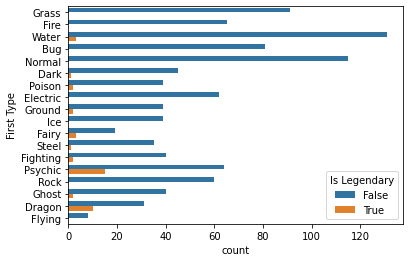

In [11]:
sns.countplot(y = "First Type", data = poke_data, hue = "Is Legendary")

In [6]:
#sns.scatterplot(y = "First Type", x = "Stat Total", data = poke_data, hue = "Generation", palette = hue_colors)

In [13]:
poke_data.columns

Index(['Pokemon Number', 'Stat Total', 'HP', 'Attack', 'Defense', 'Sp.Atk',
       'Sp.Def', 'Speed', 'Mega', 'First Type', 'Second Type', 'Species',
       'First Ability', 'Second Ability', 'Hidden Ability', 'Generation',
       'Is Sub Legendary', 'Is Legendary', 'Is Mythical'],
      dtype='object')

In [14]:
hue_colors = {
    "Generation 1" : "blue",
    "Generation 2" : "gold",
    "Generation 3" : "green", 
    "Generation 4" : "silver",
    "Generation 5" : "black",
    "Generation 6" : "pink",
    "Generation 7" : "yellow",
    "Generation 8" : "purple",
}

### Adding a Psuedo Legendaries column

In [2]:
#r = requests.get("https://pokemon.fandom.com/wiki/Pseudo-Legendary_Pokémon")
#site = bs(r.content)

In [3]:
#pseudos = [name.get_text().rstrip("\n") for name in site.findAll("th")]

In [4]:
#poke_data["Pseudo"] = [name.split("(")[0] in pseudos for name,x in poke_data.iterrows()]

In [5]:
#pseudos

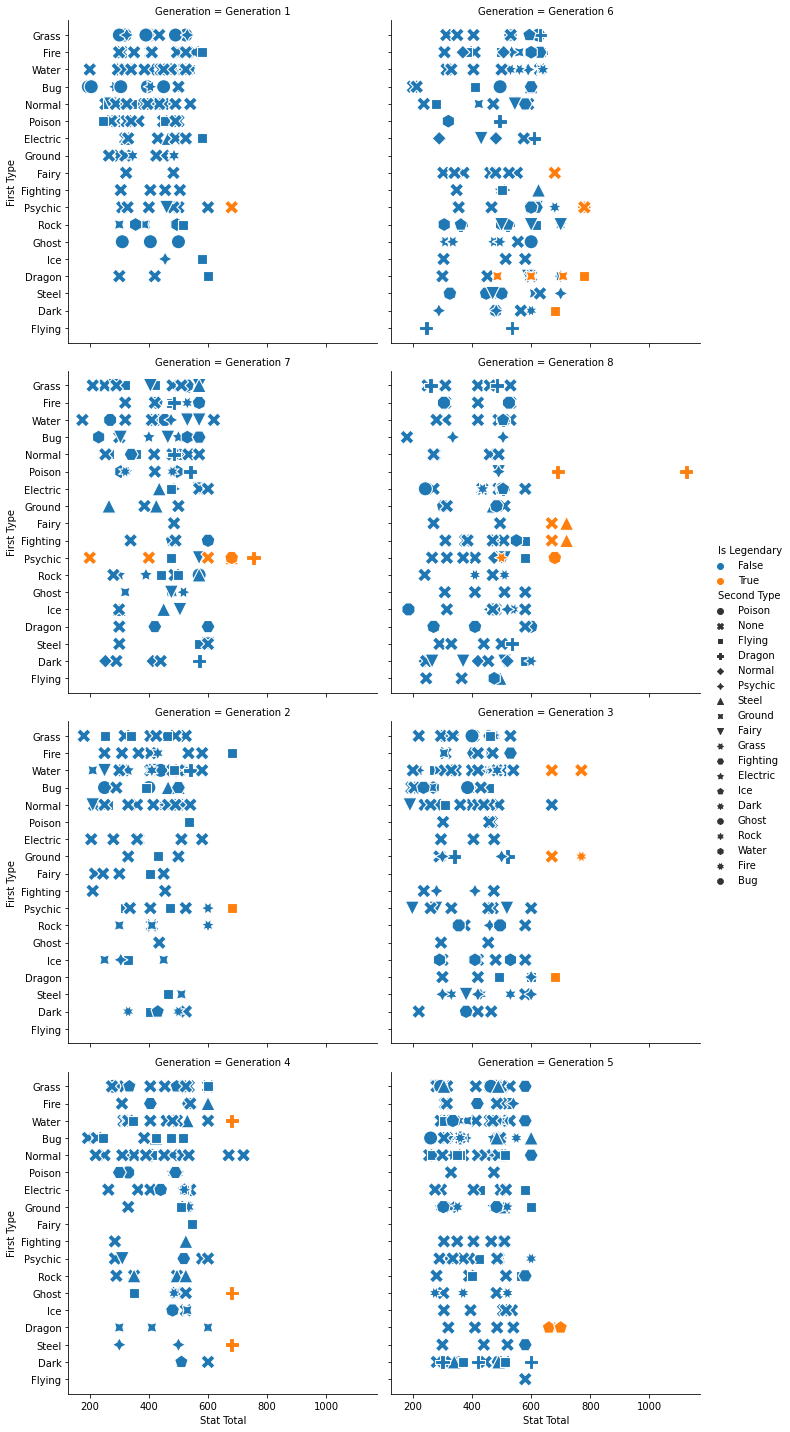

In [19]:
sns.relplot(x = "Stat Total",
            y = "First Type", 
            data = poke_data,
            kind = "scatter", 
            col = "Generation",
            col_wrap = 2,
            style = "Second Type",
            hue = "Is Legendary",
            #size = "Is Legendary",
            #size_order = [True, False],
            s = 200,
            )

### Legendary pokemon are usually only of one type, as indicated by the X, also they are usually at the higher end of the stat total, generation 1 had the fewest legendaries, and Generation 6 and 8 are tied for most, with 8.

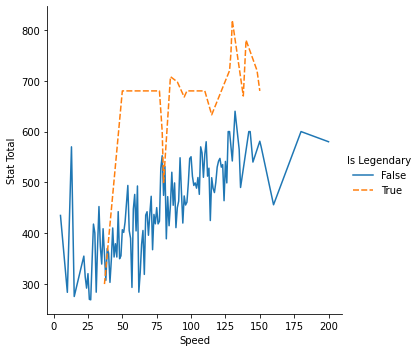

In [20]:
sns.relplot(
    x = "Speed",
    y = "Stat Total",
    data = poke_data,
    kind = "line",
    style = "Is Legendary",
    hue = "Is Legendary",
    ci = None,
)

In [21]:
poke_data.columns

Index(['Pokemon Number', 'Stat Total', 'HP', 'Attack', 'Defense', 'Sp.Atk',
       'Sp.Def', 'Speed', 'Mega', 'First Type', 'Second Type', 'Species',
       'First Ability', 'Second Ability', 'Hidden Ability', 'Generation',
       'Is Sub Legendary', 'Is Legendary', 'Is Mythical'],
      dtype='object')

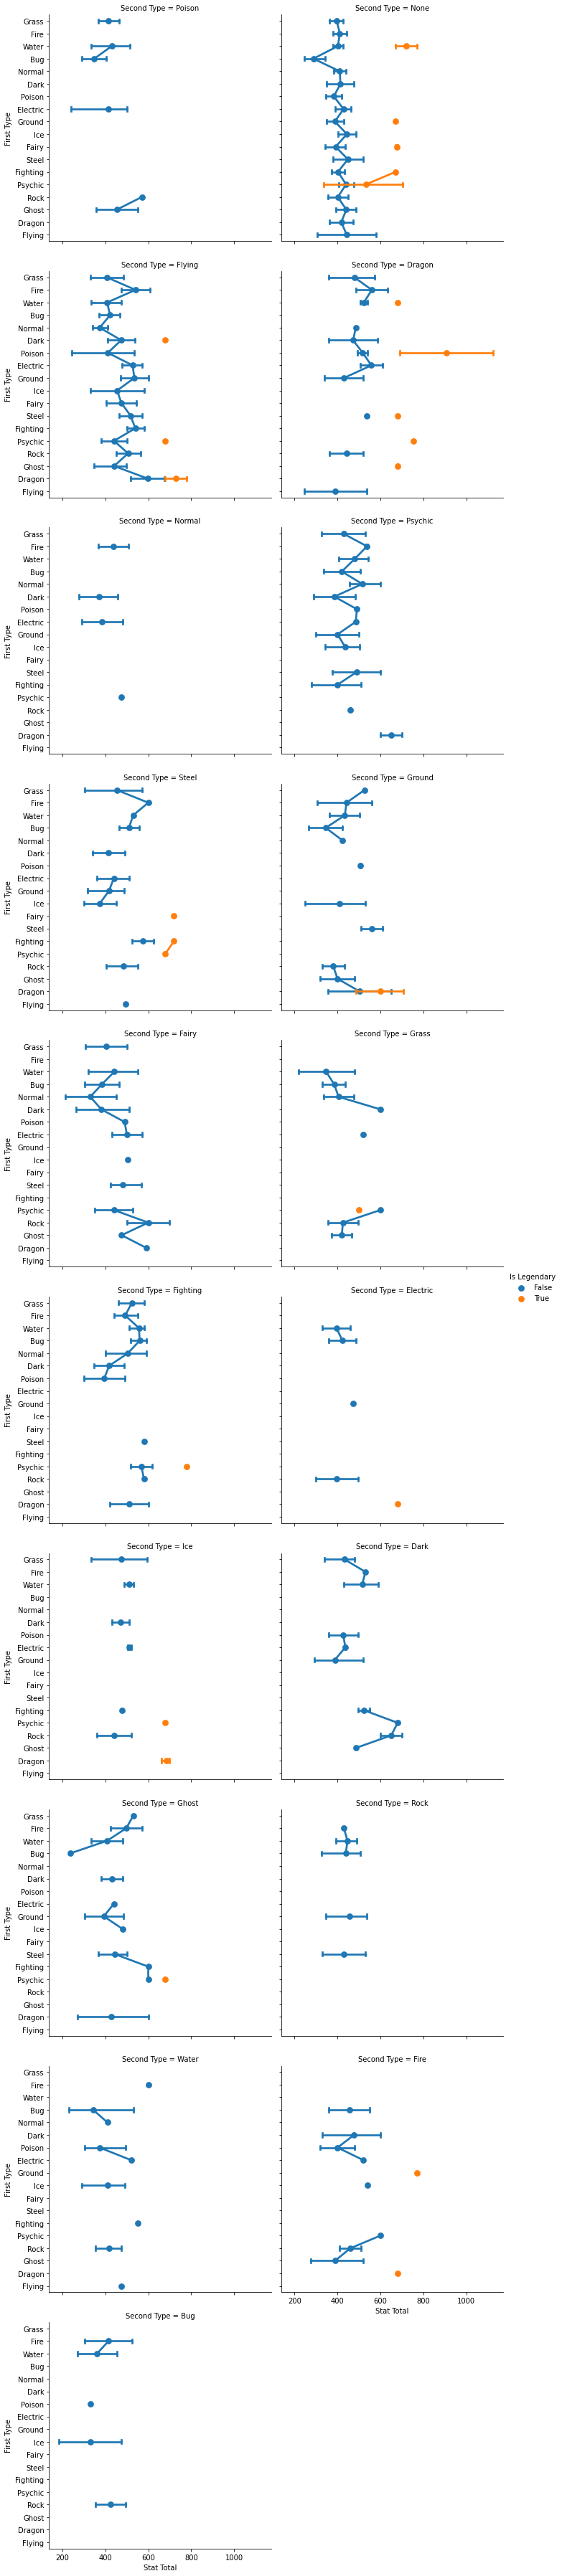

In [22]:
sns.catplot(
    data = poke_data,
    y = "First Type",
    x= "Stat Total",
    kind = "point",
    hue = "Is Legendary",
    col = "Second Type",
    col_wrap = 2,
    capsize = .3,

)

In [1]:
#poke_data[poke_data["Pseudo"] == True]

## Going to create a one category to classify special pokemon(All Legendaries, Mythicals, Sub legendaries)
### This will allow for eaiser data analysis

In [ ]:
special_poke = np.logical_or.reduce((poke_data["Is Legendary"],
                                     poke_data["Is Mythical"],
                                     poke_data["Is Sub Legendary"]))

In [ ]:
len(special_poke)

In [ ]:
poke_data["Special Pokemon"] = special_poke

In [ ]:
poke_data[poke_data["Special Pokemon"] == True]

In [ ]:
poke_data[np.logical_or(poke_data["Is Legendary"], poke_data["Is Sub Legendary"])]

In [ ]:
poke_data[poke_data["Is Mythical"] == True]

In [ ]:
96 + 30

In [ ]:
sns.relplot(
    data = poke_data, 
    x = "Stat Total",
    y = "First Type",
    hue = "Mega",
    size = "Special Pokemon",
    size_order = [True, False],
    kind = "scatter",
    style = "Special Pokemon",
    col = "Second Type",
    col_wrap = 2,
)

,Pokemon Number,Stat Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Mega,First Type,...,Species,First Ability,Second Ability,Hidden Ability,Generation,Is Sub Legendary,Is Legendary,Is Mythical,Pseudo,Special Pokemon
Caterpie,10,195,45,30,35,20,20,45,False,Bug,...,Worm Pokémon,Shield Dust,None,Run Away,Generation 1,False,False,False,False,False
Metapod,11,205,50,20,55,25,25,30,False,Bug,...,Cocoon Pokémon,Shed Skin,None,None,Generation 1,False,False,False,False,False
Weedle,13,195,40,35,30,20,20,50,False,Bug,...,Hairy Bug Pokémon,Shield Dust,None,Run Away,Generation 1,False,False,False,False,False
Kakuna,14,205,45,25,50,25,25,35,False,Bug,...,Cocoon Pokémon,Shed Skin,None,None,Generation 1,False,False,False,False,False
Zubat,41,245,40,45,35,30,40,55,False,Poison,...,Bat Pokémon,Inner Focus,None,Infiltrator,Generation 1,False,False,False,False,False
Magikarp,129,200,20,10,55,15,20,80,False,Water,...,Fish Pokémon,Swift Swim,None,Rattled,Generation 1,False,False,False,False,False
Sentret,161,215,35,46,34,35,45,20,False,Normal,...,Scout Pokémon,Run Away,Keen Eye,Frisk,Generation 2,False,False,False,False,False
Pichu,172,205,20,40,15,35,35,60,False,Electric,...,Tiny Mouse Pokémon,Static,None,Lightning Rod,Generation 2,False,False,False,False,False
Cleffa,173,218,50,25,28,45,55,15,False,Fairy,...,Star Shape Pokémon,Cute Charm,Magic Guard,Friend Guard,Generation 2,False,False,False,False,False
Igglybuff,174,210,90,30,15,40,20,15,False,Normal,...,Balloon Pokémon,Cute Charm,Competitive,Friend Guard,Generation 2,False,False,False,False,False
